In [ ]:
import numpy as np
import time
from IPython import display
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

# initialize reviewer
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)

class visualizer():
    def __init__(self,**args):
        self.w_init = -2.7
        if 'w_init' in args:
            self.w_init = args['w_init']
        self.alpha = 0.01
        if 'alpha' in args:
            self.alpha = args['alpha']  
        self.max_its = 20
        if 'max_its' in args:
            self.max_its = args['max_its']
        self.w_history = []
            
    # the gradient descent algorithm for minimizing our simple but tricky function
    def gradient_descent(self):
        # w weight history
        self.w_history = []
        w = self.w_init
        self.w_history.append(w)

        # start gradient descent loop
        for k in range(0,self.max_its):
            # calculate derivative (grad)
            grad = self.calculate_gradient(w)

            # take gradient descent step
            w = w - self.alpha*grad

            # store weights at this iteration
            self.w_history.append(w)

    # calculate cost function at input w
    def calculate_cost_value(self,w):
        g = w**4 + w**2 + 10*w
        return g

    # calculate the gradient of the cost function at an input w
    def calculate_gradient(self,w):
        grad = 4*(w**3) + 2*w + 10
        return grad

    # define the linear surrogate generated at each gradient step
    def surrogate(self,y,x):
        g = self.calculate_cost_value(y)
        grad = self.calculate_gradient(y)
        h = g + grad*(x - y)
        return h

    # show cost function to minimize
    def make_function(self,ax):
        s = np.linspace(-3,2,200)
        t =  self.calculate_cost_value(s)
        ax.plot(s,t,'-k',linewidth = 2)

        # pretty the figure up
        ax.set_xlim(-3,2)
        ax.set_ylim(-30,60)
        ax.set_xlabel('$w$',fontsize=20,labelpad = 20)
        ax.set_ylabel('$g(w)$',fontsize=20,rotation = 0,labelpad = 20)

    # plot each step of gradient descent
    def run_demo(self):
        # run gradient descent
        self.gradient_descent()
        w_path = self.w_history
        fig = plt.figure(facecolor = 'white')

        # open frame writer
        with writer.saving(fig, "convex_gradrun.mp4", 100):

            # make figure to update
            ax1 = fig.add_subplot(111)

            # make cost function path based on gradient descent steps (in w_path)
            g_path = []
            for i in range(0,len(w_path)):
                w = w_path[i]
                g_path.append(self.calculate_cost_value(w))

            # plot costs function
            self.make_function(ax1)  

            # write frame
            for j in range(20):
                writer.grab_frame()
                            
            # clear frame
            display.clear_output(wait=True)
            display.display(plt.gcf()) 

            # colors for points
            s = np.linspace(1/len(g_path),1,len(g_path))
            s.shape = (len(s),1)
            colorspec = np.concatenate((s,np.flipud(s)),1)
            colorspec = np.concatenate((colorspec,np.zeros((len(s),1))),1)

            # plot initial point
            ax1.plot(w_path[0],g_path[0],'o',markersize = 10, color = colorspec[0,:], markerfacecolor = colorspec[0,:])

            # write to frame
            for j in range(20):
                writer.grab_frame()
                            
            # clear frame
            display.clear_output(wait=True)
            display.display(plt.gcf())   

            # plot a tracer on this first point just for visualization purposes
            t = np.linspace(-30,g_path[0],100)
            s = w_path[0]*np.ones((100))
            ax1.plot(s,t,'--k')

            # write frame
            for j in range(20):
                writer.grab_frame()
                            
            # clear frame
            display.clear_output(wait=True)
            display.display(plt.gcf())     

            # plot first surrogate and point traveled to on that surrogate
            s_range = 10  # range over which to show the linear surrogate
            s = np.linspace(w_path[0]-s_range,w_path[0]+s_range,1000)
            t = self.surrogate(w_path[0],s)

            # plot frame
            h, = ax1.plot(s,t,'m',linewidth = 2)

            # write to frame
            for j in range(20):
                writer.grab_frame()
                            
            # clear frame
            display.clear_output(wait=True)
            display.display(plt.gcf()) 

            # plot to frame
            r, = ax1.plot(w_path[1],self.surrogate(w_path[0],w_path[1]),marker = '*',markersize = 11, c = 'k')

            # write to frame
            for j in range(20):
                writer.grab_frame()
                            
            # clear frame
            display.clear_output(wait=True)
            display.display(plt.gcf()) 

            # loop over the remaining iterations, showing
            # - the linear surrogate at the first few steps
            # - color changing from green (start) to red (end) of gradient descent run
            for i in range(1,len(g_path)):
                    # with the first few points plot the surrogates as well for illustration
                    if i < 4:
                        # plot cost function evaluated at next gradient descent step
                        ax1.plot(w_path[i],g_path[i],'o',markersize = 10, color = colorspec[i-1,:], markerfacecolor = colorspec[i-1,:])

                        # write to frame
                        for j in range(20):
                            writer.grab_frame()

                        # clear frame
                        display.clear_output(wait=True)
                        display.display(plt.gcf()) 

                        # plot linear surrogate and point traveled too
                        if i < 3:
                            # remove previously drawn linear surrogate, point on it, etc.,
                            h.remove()
                            r.remove()
                            display.clear_output(wait=True)
                            display.display(plt.gcf())  

                            # generate linear surrogate and plot
                            s_range = 5
                            s = np.linspace(w_path[i]-s_range,w_path[i]+s_range,2000)
                            t = self.surrogate(w_path[i],s)
                            
                            # plot frame
                            h, = ax1.plot(s,t,'m',linewidth = 2)
                            
                            # write frame
                            for j in range(20):
                                writer.grab_frame()
                                
                            # clear frame
                            display.clear_output(wait=True)
                            display.display(plt.gcf()) 

                            # generate point on linear surrogate we travel too
                            ind = np.argmin(abs(s - w_path[i + 1]))
                            r, = ax1.plot(s[ind],t[ind],marker = '*', markersize = 11, c = 'k')

                            # write frame
                            for j in range(20):
                                writer.grab_frame()

                            # clear frame
                            display.clear_output(wait=True)
                            display.display(plt.gcf()) 

                    # remove linear surrogate, point, etc.,
                    if i == 4:
                        time.sleep(0.5)
                        h.remove()
                        r.remove()
                        display.clear_output(wait=True)
                        display.display(plt.gcf())     

                    # for later iterations just plot point so things don't get too visually cluttered
                    if i > 4: 
                        # plot to frame
                        ax1.plot(w_path[i],g_path[i],'o',markersize = 10, color = colorspec[i-1,:], markerfacecolor = colorspec[i-1,:])

                        # record frame
                        for j in range(2):
                            writer.grab_frame()
                                
                        # clear frame
                        display.clear_output(wait=True)
                        display.display(plt.gcf()) 

                    # color the final point red just for visualization purposes
                    if i == len(g_path) - 1:
                        # plot to frame
                        ax1.plot(w_path[i],g_path[i],'o',markersize = 10, color = colorspec[i-1,:], markerfacecolor = colorspec[i-1,:])
                        t = np.linspace(-30,g_path[i],100)
                        s = w_path[i]*np.ones((100))
                        ax1.plot(s,t,'--k')

                        # record frame
                        writer.grab_frame()

                        # clear frame
                        display.clear_output(wait=True)
                        display.display(plt.gcf()) 

In [1]:
# add backend files - this needs to be run before any of the demos
import sys
sys.path.append('demo_python_backend_files')


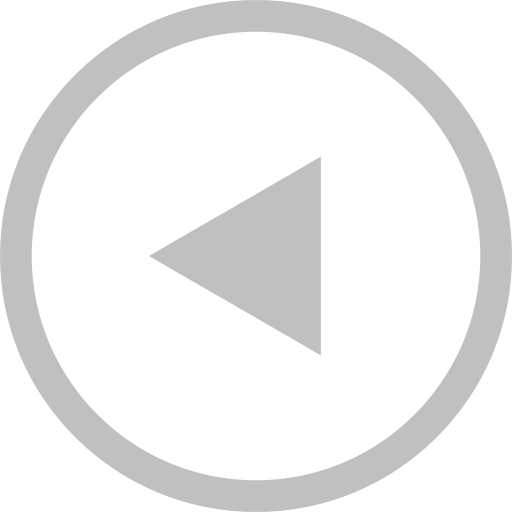
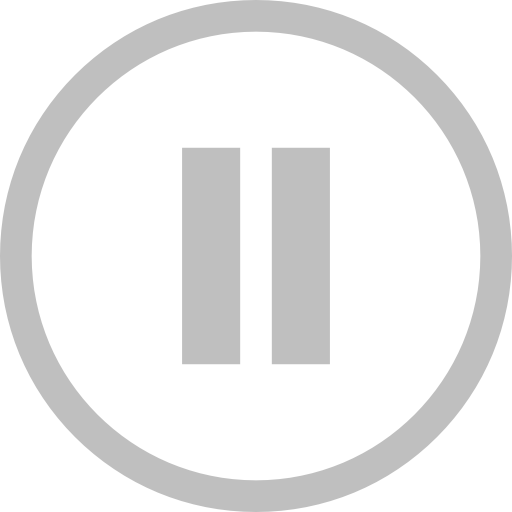
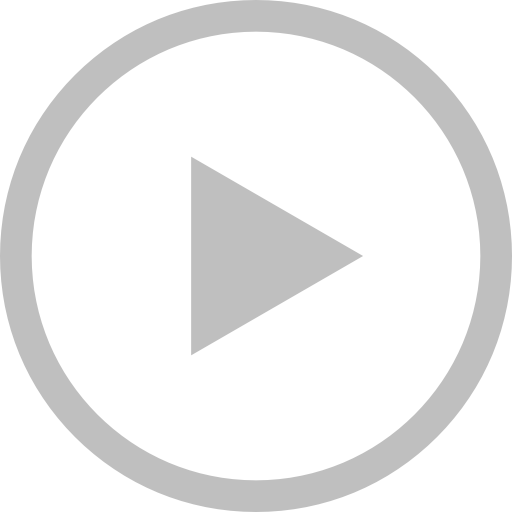
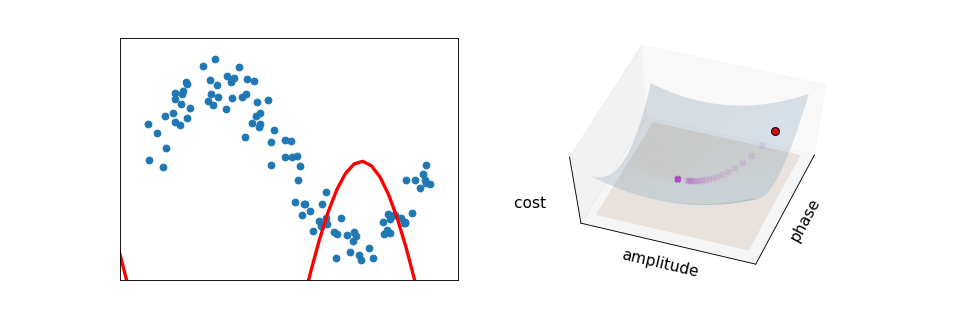
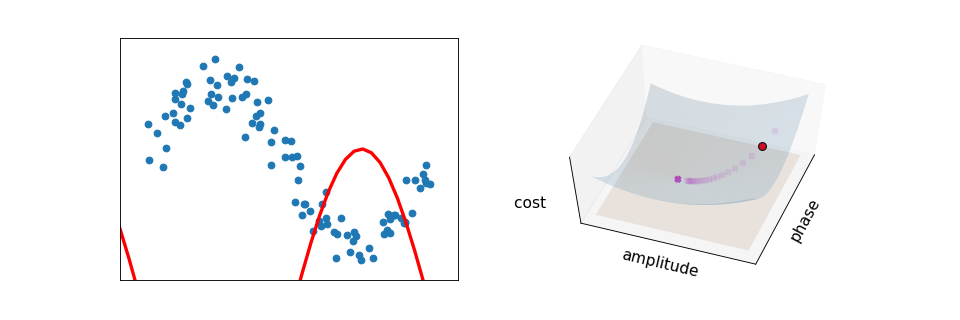
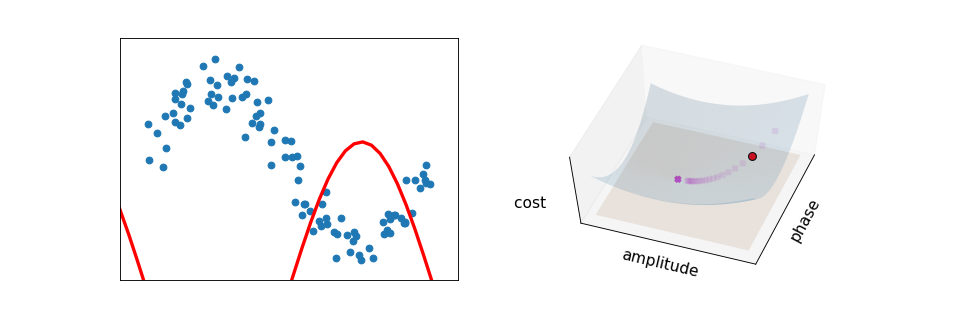
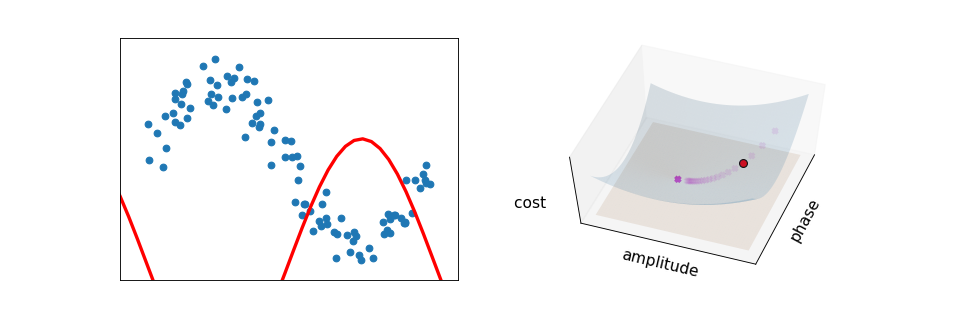
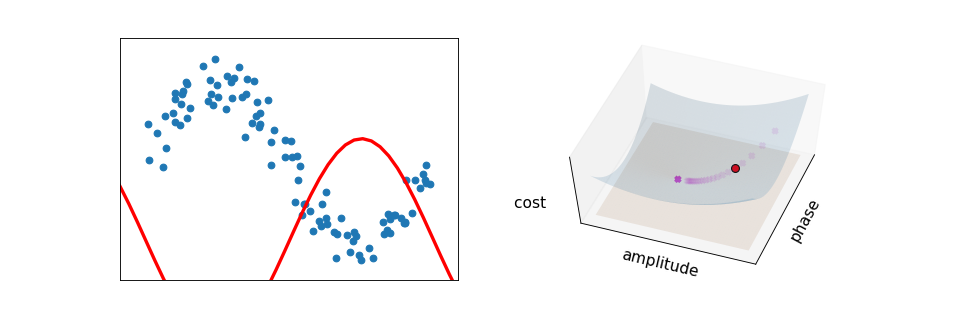
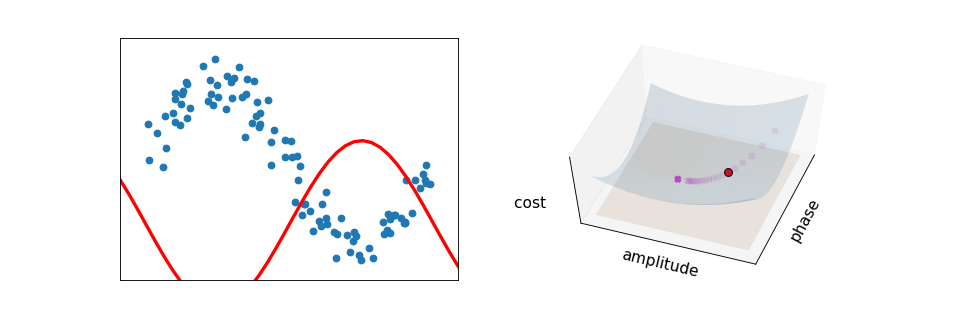
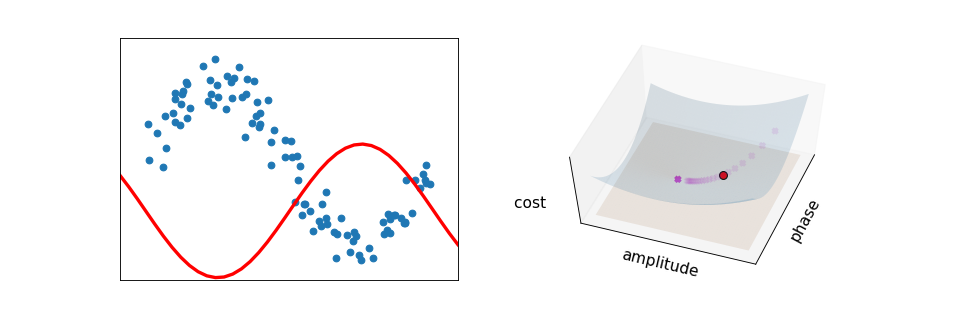
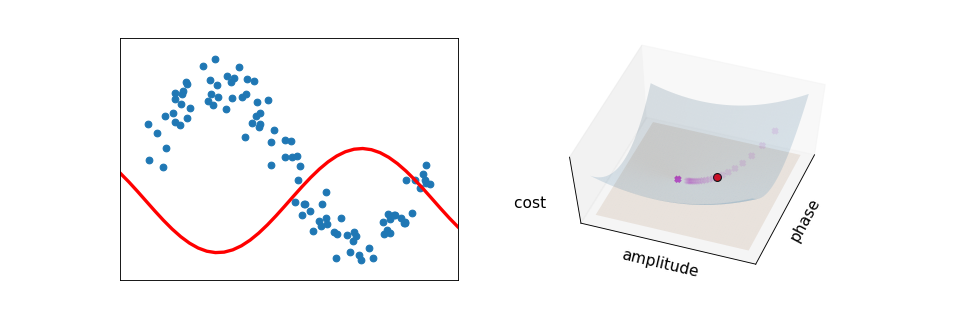
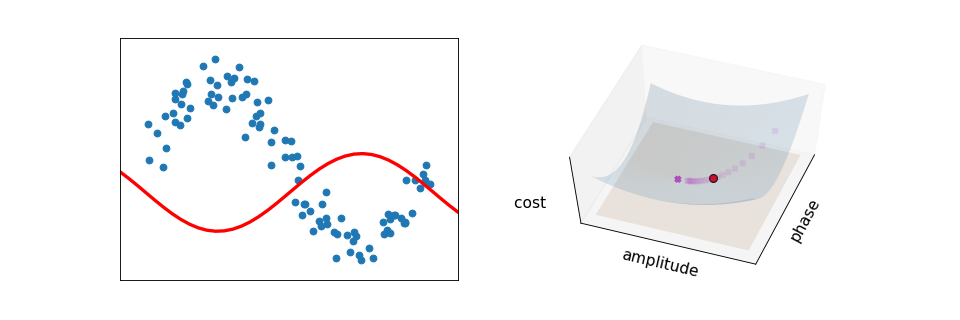
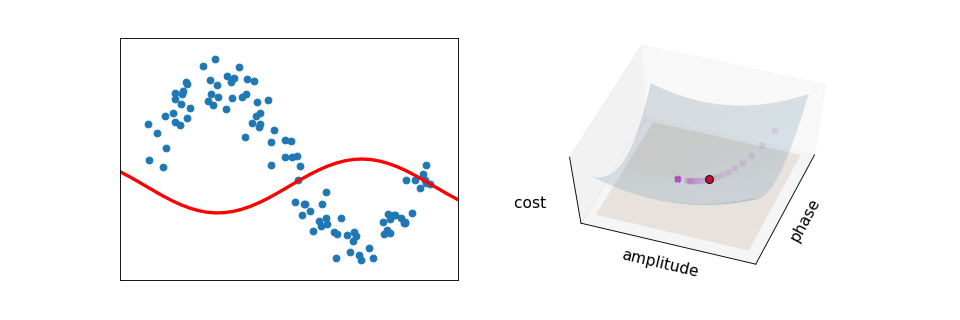
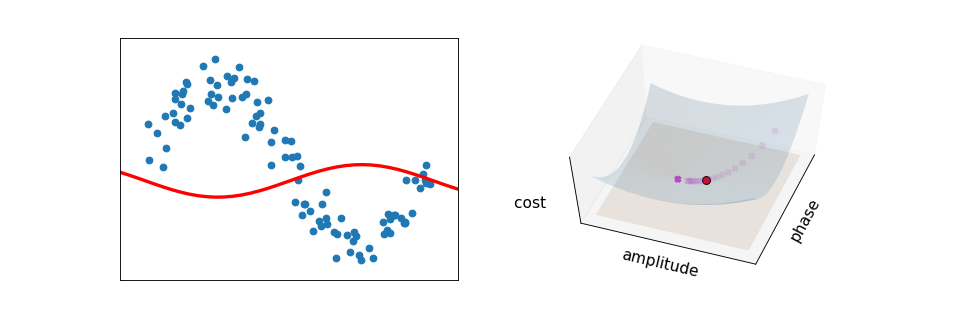
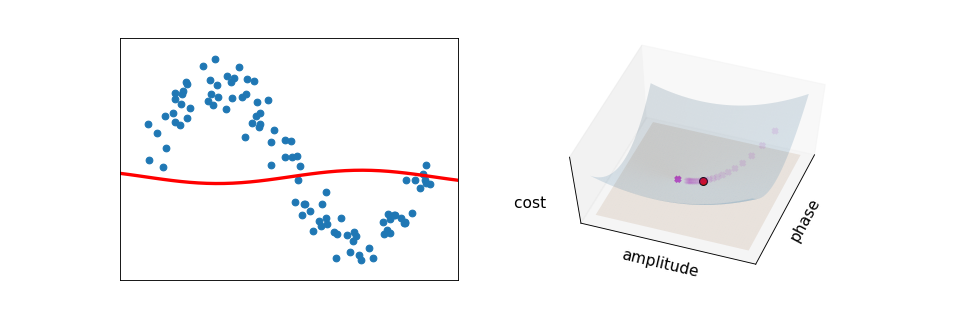
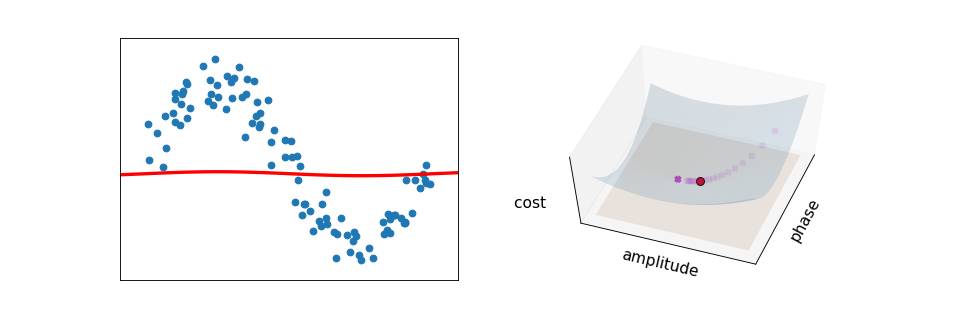
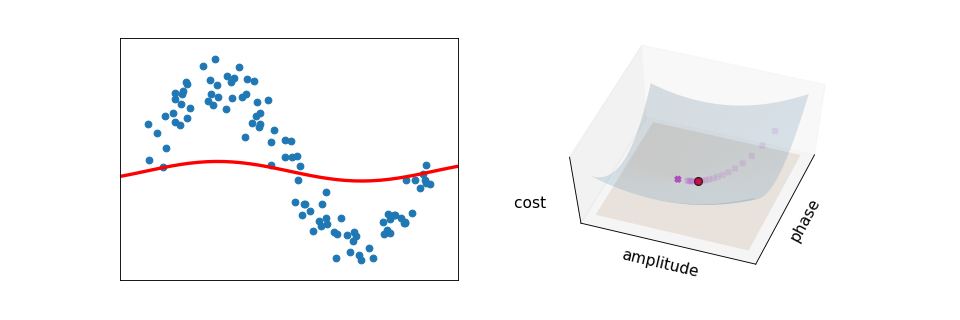
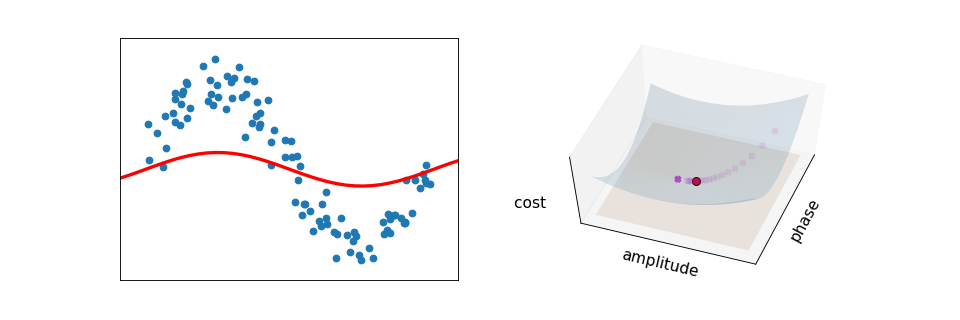
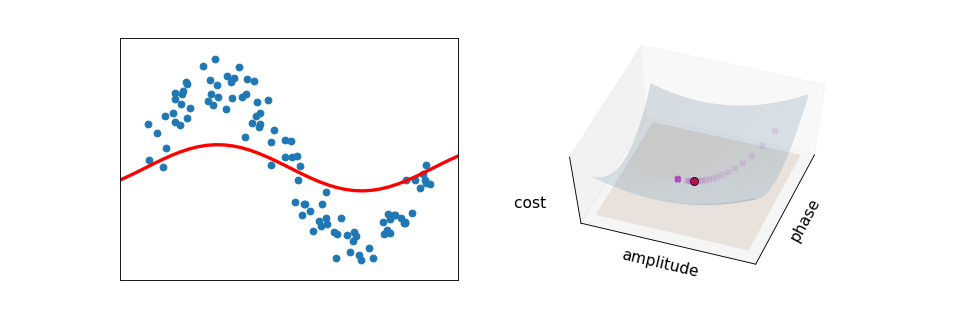
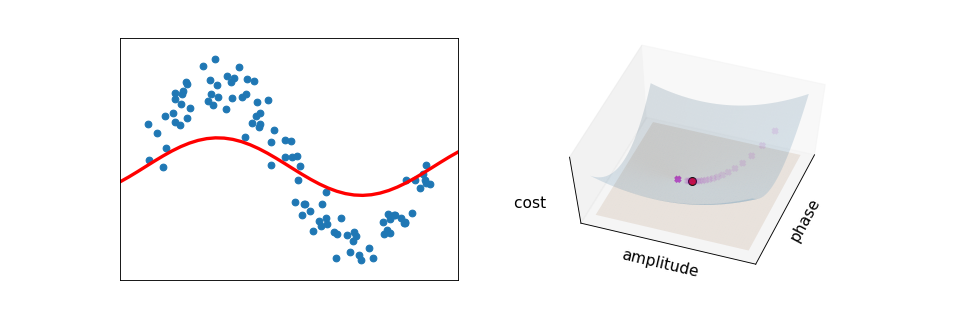
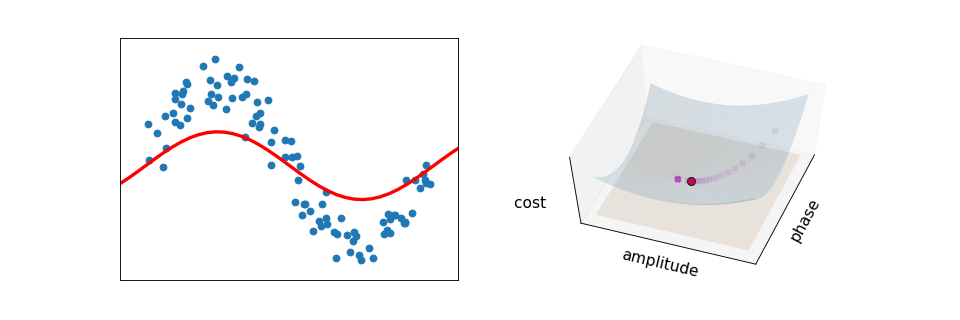
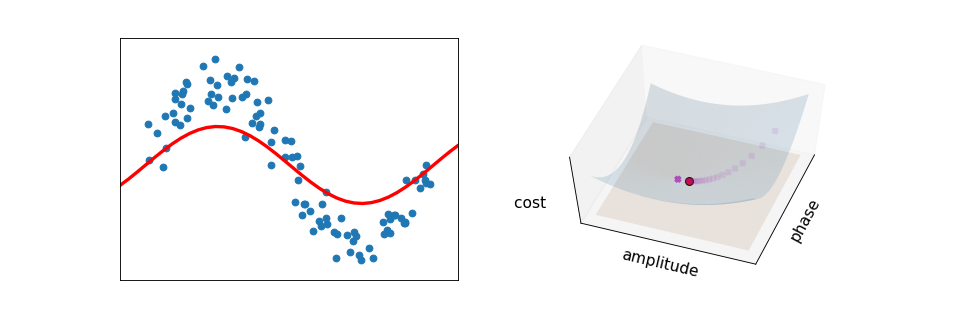
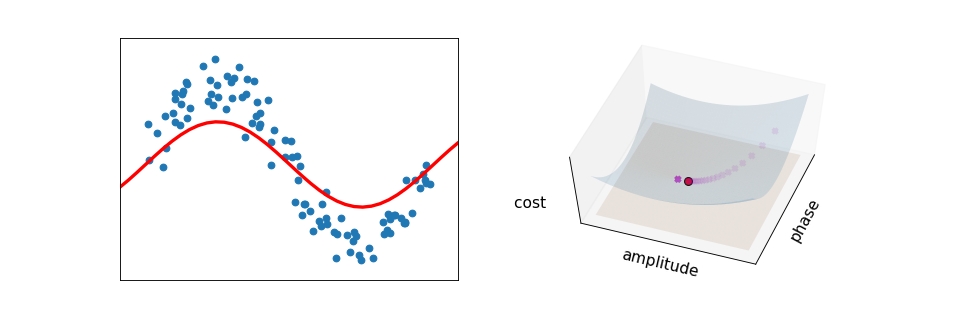
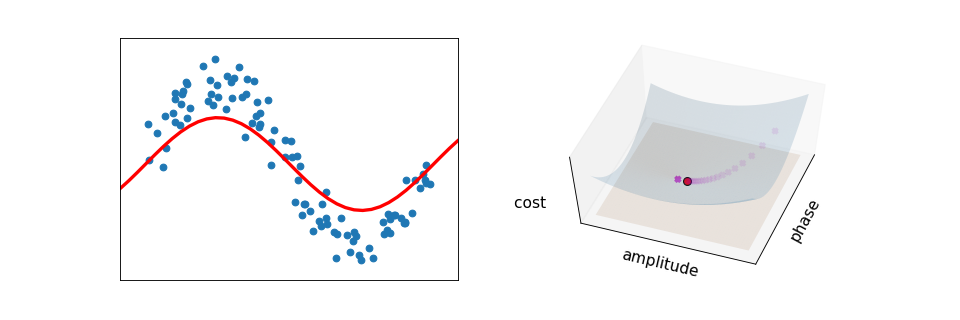
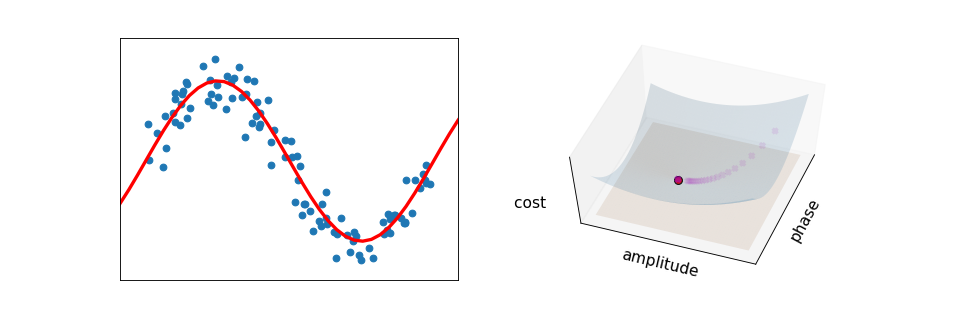
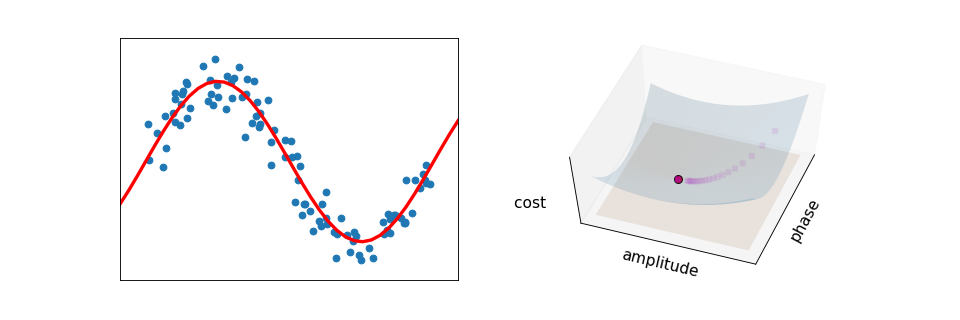
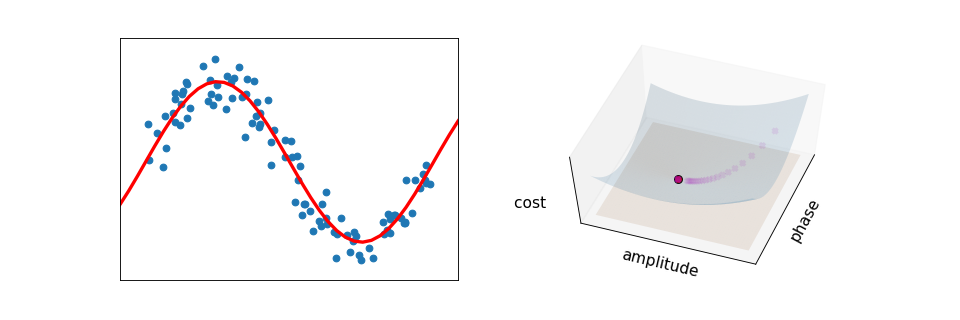
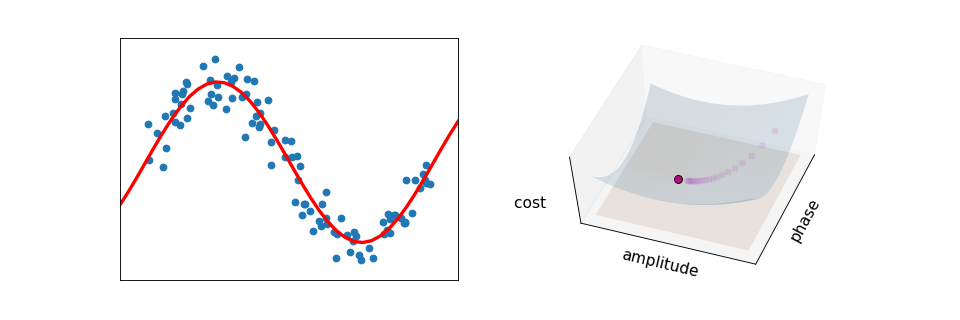
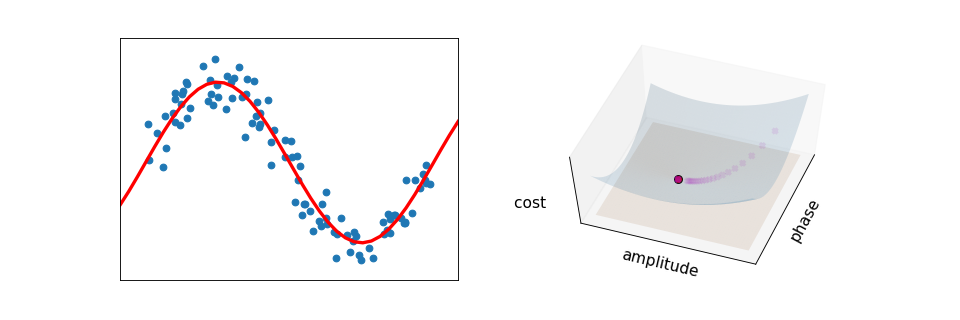
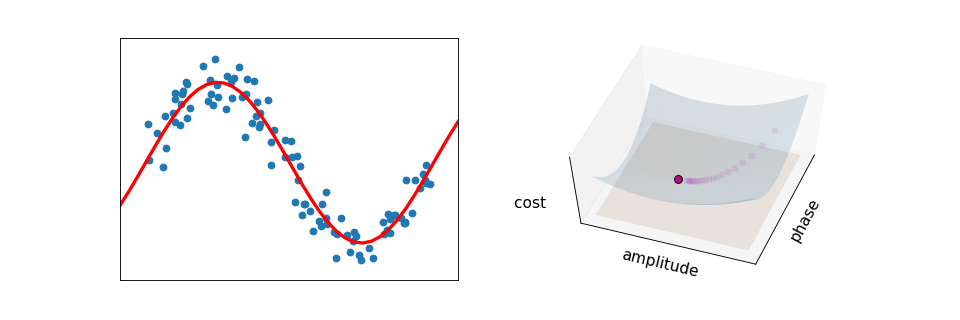
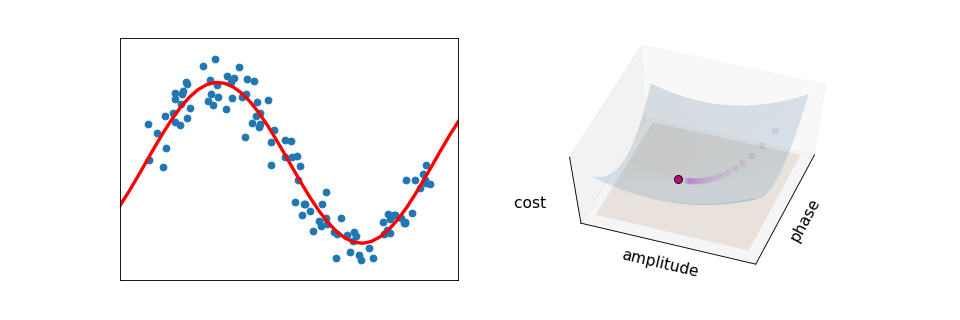
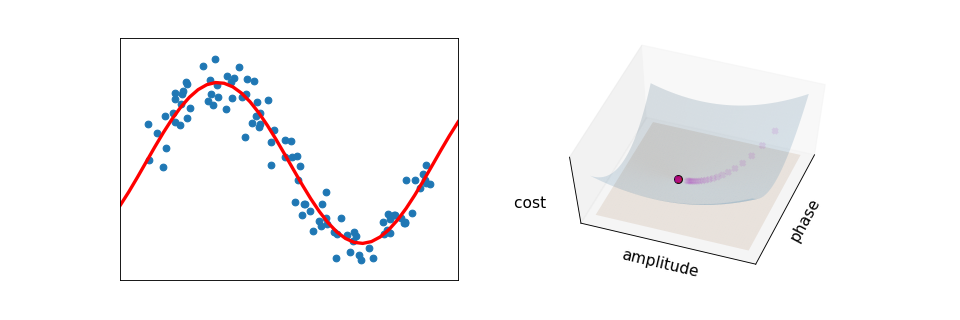
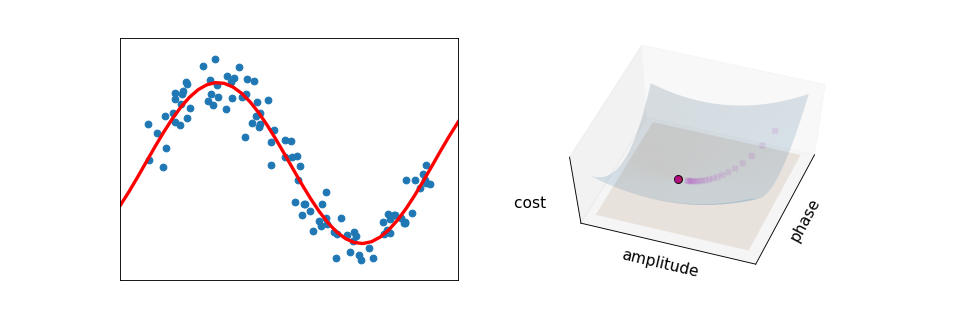
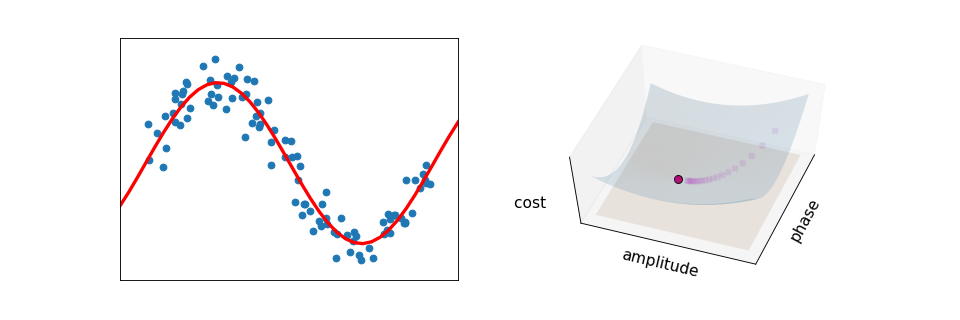

In [2]:
# import statements
%matplotlib inline
import ml_optimization_1dim_sliders as demo
demo = demo.ml_optimization_1dim_sliders()
       
# call the demonstration
csvname = 'demo_datasets/toy_sinusoidal_regression_data.csv'
demo.load_data(csvname,'sin')

# run gradient descent
demo.run_lin_regression_grad_descent(inits = [-2.5,2.5],max_its = 30)

# run slider
demo.fitting_slider(xlabel = 'phase', ylabel= 'amplitude',view = [60,20], fit_type = 'sine fit')